<a href="https://colab.research.google.com/github/Ph1so/neural-network/blob/main/Neural_Network_Phi_Nguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files #upload kaggle token - make account on kaggle and go to your settings to download token
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          19877        400  0.9411765        
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1692         35  1.0              
m1relly/heart-attack-prediction                             Heart Attack Prediction                        519KB  2024-04-01 18:17:52            972         24  1.0              
jatinthakur706/most-watched-netflix-original-shows-tv-time  Most watched Netflix original shows (TV Time)

In [ ]:
!kaggle competitions download -c digit-recognizer

 78% 12.0M/15.3M [00:00<00:00, 61.2MB/s]
100% 15.3M/15.3M [00:00<00:00, 55.9MB/s]


In [ ]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 5 5 ... 5 5 1] [5 3 4 ... 3 9 0]
0.10685365853658536
Iteration:  10
[3 8 5 ... 1 5 1] [5 3 4 ... 3 9 0]
0.15058536585365853
Iteration:  20
[3 0 5 ... 1 5 1] [5 3 4 ... 3 9 0]
0.20346341463414633
Iteration:  30
[3 0 7 ... 1 5 3] [5 3 4 ... 3 9 0]
0.2735365853658537
Iteration:  40
[3 0 7 ... 3 5 0] [5 3 4 ... 3 9 0]
0.3085609756097561
Iteration:  50
[3 0 7 ... 3 5 0] [5 3 4 ... 3 9 0]
0.32570731707317074
Iteration:  60
[2 0 7 ... 3 5 0] [5 3 4 ... 3 9 0]
0.3471463414634146
Iteration:  70
[2 0 7 ... 3 5 0] [5 3 4 ... 3 9 0]
0.3736829268292683
Iteration:  80
[2 0 7 ... 3 5 0] [5 3 4 ... 3 9 0]
0.40295121951219515
Iteration:  90
[8 0 7 ... 3 5 0] [5 3 4 ... 3 9 0]
0.4398048780487805
Iteration:  100
[8 0 7 ... 3 5 0] [5 3 4 ... 3 9 0]
0.47560975609756095
Iteration:  110
[8 5 7 ... 2 5 0] [5 3 4 ... 3 9 0]
0.5157804878048781
Iteration:  120
[8 5 7 ... 2 5 0] [5 3 4 ... 3 9 0]
0.5541951219512196
Iteration:  130
[8 5 7 ... 2 9 0] [5 3 4 ... 3 9 0]
0.5865121951219512
Iteration: 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]


    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



Prediction:  [4]
Label:  4


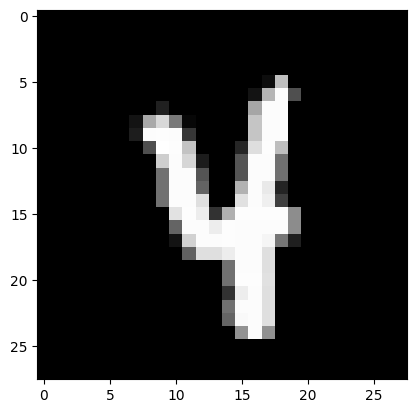

None
Prediction:  [7]
Label:  7


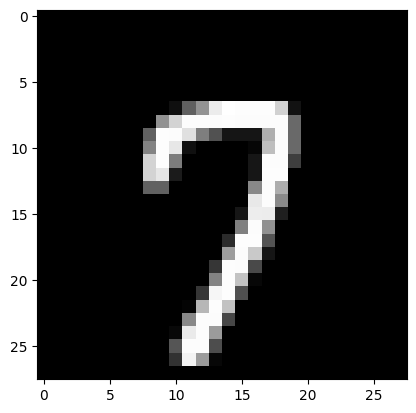

None
Prediction:  [8]
Label:  3


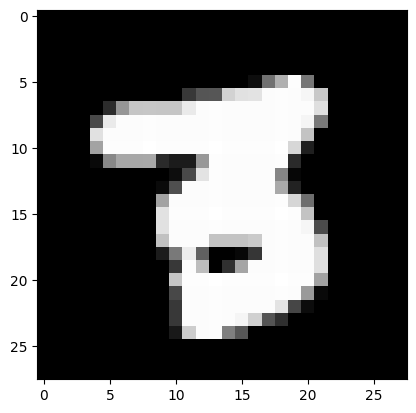

None
Prediction:  [0]
Label:  3


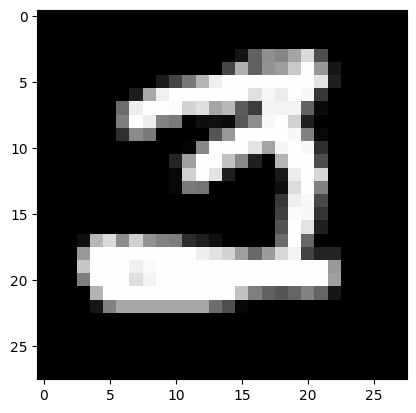

None


In [ ]:
print(test_prediction(2, W1, b1, W2, b2))
print(test_prediction(125, W1, b1, W2, b2))
print(test_prediction(645, W1, b1, W2, b2))
print(test_prediction(657, W1, b1, W2, b2))
